In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import Email dataset and make it undirected
edge_list_np = np.loadtxt('email-Eu-core.txt', dtype=int)
attributes  = np.loadtxt('email-Eu-core-department-labels.txt',dtype = int)

attr_dict = {}
for pair in attributes:
    
    attr_dict[pair[0]] = pair[1]
    

G = nx.from_edgelist(edge_list_np)
len(G.nodes())
H = nx.DiGraph()
H.add_edges_from(edge_list_np)
nx.set_node_attributes(H,attr_dict,'department')
H.in_degree()
G.degree()
H.adjacency()
    
Emails = H.to_undirected(reciprocal=True)
node_data = Emails.nodes(data=True)

Text(0, 0.5, 'p')

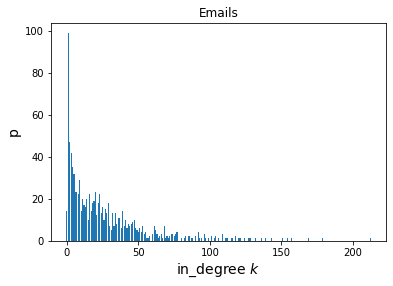

In [3]:
#in degrees in directed network

k_i = sorted([degree for node, degree in H.in_degree()])
from collections import Counter

degreeCount = Counter(k_i)
degrees, counts = zip(*degreeCount.items())

#counts = np.array(counts)/100

plt.bar(degrees, counts,)
plt.title('Emails')
plt.xlabel('in_degree $k$', fontsize=14)
plt.ylabel('p', fontsize=14)

Text(0, 0.5, 'p')

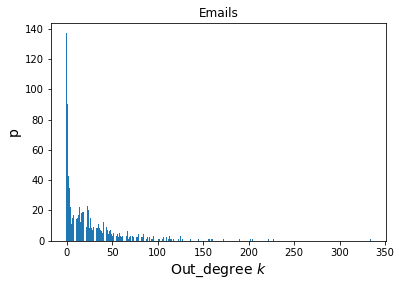

In [4]:
#out degrees in directed network

k_i = sorted([degree for node, degree in H.out_degree()])
from collections import Counter

degreeCount = Counter(k_i)
degrees, counts = zip(*degreeCount.items())

#counts = np.array(counts)/100

plt.bar(degrees, counts,)
plt.title('Emails')
plt.xlabel('Out_degree $k$', fontsize=14)
plt.ylabel('p', fontsize=14)

Text(0, 0.5, 'p')

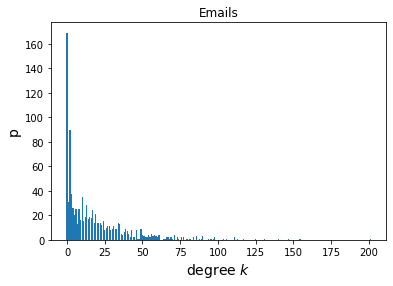

In [5]:
#degrees in undirected network

k_i = sorted([degree for node, degree in Emails.degree()])
from collections import Counter

degreeCount = Counter(k_i)
degrees, counts = zip(*degreeCount.items())

#counts = np.array(counts)/100

plt.bar(degrees, counts,)
plt.title('Emails')
plt.xlabel('degree $k$', fontsize=14)
plt.ylabel('p', fontsize=14)

In [6]:
print(len(Emails.nodes()))
print(len(Emails.edges()))
#result = nx.k_components(Emails)
#print(result)
giant = max(nx.connected_components(Emails), key=len)
#print(giant)
#print(len(giant))
Emails_connected = Emails.subgraph(giant)
print(len(Emails_connected.nodes()))
len(Emails_connected.edges())

1005
9507
776


9447

1


Text(0, 0.5, 'p')

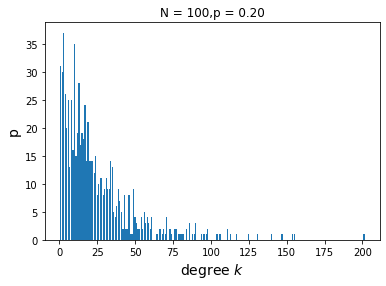

In [7]:
k_i = sorted([degree for node, degree in Emails_connected.degree()])
from collections import Counter


degreeCount = Counter(k_i)
print(degreeCount[80])
degrees, counts = zip(*degreeCount.items())

#counts = np.array(counts)/100

plt.bar(degrees, counts,)
plt.title('N = 100,p = 0.20')
plt.xlabel('degree $k$', fontsize=14)
plt.ylabel('p', fontsize=14)

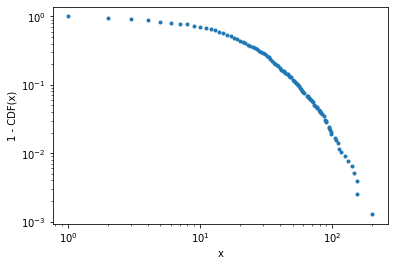

In [8]:
def plot_ccdf(data, ax, label=None):
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    ax.plot(sorted_vals, ccdf, ".", label=label)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel("x")
    ax.set_ylabel("1 - CDF(x)")


degrees = [d for n, d in Emails_connected.degree()]
fig, ax = plt.subplots()
plot_ccdf(degrees, ax, label=None)

In [11]:
#save graph into adjlist
nx.write_gexf(Emails_connected, "Emails_connected.gexf")
#save graph into edgelist
nx.write_edgelist(Emails_connected,"Emails_connected.txt")

([<matplotlib.axis.XTick at 0x201ed4f6688>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

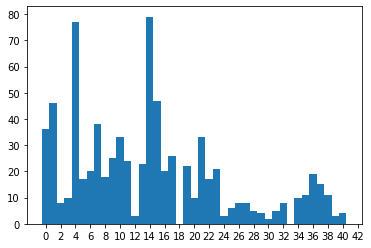

In [33]:
#take the connected component attributes and make a histogram of them.
Emails_connected_departments = []
Emails_connected_attributes = []
for node in Emails_connected.nodes(data=True):
    Emails_connected_departments.append(node[1]['department'])
    Emails_connected_attributes.append((int(node[0]),int(node[1]['department'])))
custom_bins = []
for i in range(42):
    custom_bins.append(i-0.5)
plt.hist(Emails_connected_departments,bins = custom_bins)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42])

In [35]:
#save connected attributes
np.savetxt("Emails_connected_attributes.txt",np.array(Emails_connected_attributes))

In [18]:
from collections import Counter

degreeCount = Counter(sorted(attributes[:,1]))
degrees, counts = zip(*degreeCount.items())
sorted(degreeCount.items())
degreeCount.most_common()

[(4, 109),
 (14, 92),
 (1, 65),
 (21, 61),
 (15, 55),
 (7, 51),
 (0, 49),
 (10, 39),
 (17, 35),
 (9, 32),
 (11, 29),
 (19, 29),
 (6, 28),
 (23, 27),
 (13, 26),
 (16, 25),
 (22, 25),
 (36, 22),
 (8, 19),
 (5, 18),
 (37, 15),
 (20, 14),
 (34, 13),
 (35, 13),
 (38, 13),
 (3, 12),
 (2, 10),
 (27, 10),
 (26, 9),
 (32, 9),
 (28, 8),
 (31, 8),
 (24, 6),
 (25, 6),
 (29, 5),
 (30, 4),
 (40, 4),
 (12, 3),
 (39, 3),
 (41, 2),
 (18, 1),
 (33, 1)]